# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
def bayes(priori, verosimilitud):                    # regla de Bayes
    marginal=sum(np.multiply(priori, verosimilitud))
    posteriori=np.divide(np.multiply(priori, verosimilitud), marginal)
    return posteriori

In [3]:
prioris=[1/2, 1/2]         # cuenco de galletas

v_vainilla=[3/4, 2/4]      # verosimilitud vainilla
v_chocolate=[1/4, 2/4]     # verosimilitud chocolate

In [4]:
print (bayes(prioris, v_vainilla)[0])
# 0.6 => 60% de probabilidad de que venga del cuenco de galletas 1.

0.6


What is the probability that it came from Bowl 2?

In [5]:
print (bayes(prioris, v_vainilla)[1])
print (1-bayes(prioris, v_vainilla)[0])
# 0.4 => 40% de probabilidad de que venga del cuenco de galletas 2.

0.4
0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [6]:
print (bayes(prioris, v_chocolate))
# 0.333 => 33.3% de probabilidad de que venga del cuenco de galletas 1.
# 0.667 => 66.7% de probabilidad de que venga del cuenco de galletas 2.

[0.33333333 0.66666667]


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [7]:
prioris=[1/2, 1/2]         # bolsas

v_marron=[0.3, 0.13]       # verosimilitud marron
v_amarillo=[0.2, 0.14]     # verosimilitud amarillo
v_rojo=[0.2, 0.13]         # verosimilitud rojo
v_verde=[0.1, 0.2]         # verosimilitud verde
v_naranja=[0.1, 0.16]      # verosimilitud naranja
v_mandarina=[0.1, 0]       # verosimilitud mandarina
v_azul=[0, 0.24]           # verosimilitud azul

In [8]:
print (bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[0])
# 0.7407 => 74.1% de probabilidad de que la amarilla venga de la bolsa 1.

0.7407407407407408


What is the probability that the yellow candy came from Bag 2?

In [9]:
print (bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[1])
# 0.259 => 25.9% de probabilidad de que la amarilla venga de la bolsa 2.

0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

Las probabilidades de la verde son las complementarias de cada una, es decir, la probabilidad de que la verde venga de la bolsa 1 es 0.259 y la probabilidad de que la verde venga de la bolsa 2 es 0.7407. 

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [10]:
prioris=[1/3, 1/3, 1/3]         # puertas

v_premio=[0, 1/2, 1]            # verosimilitud del premio


print (bayes(prioris, v_premio)[1])
# si no se cambia de puerta la probabilidad es 1/3

print (bayes(prioris, v_premio)[2])
# si se cambia de puerta la probabilidad es 2/3

0.3333333333333333
0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

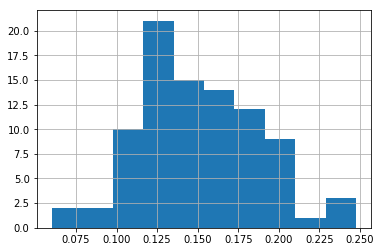

In [11]:
priori=pd.Series(np.random.uniform(0, 1, size=10000))    # distribucion a priori uniforme
sign_up=14                                               # 14 personas piden servicio


def modelo(param):                           # modelo binomial random
    res=np.random.binomial(100, param)       # se suponen 100 visitas
    return res


datos=[modelo(p) for p in priori]

posteriori=priori[list(map(lambda x: x==sign_up, datos))]   # se genera el a posteriori
posteriori.hist()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [12]:
print ('Se describe el a posteriori:')
print (posteriori.describe())

Se describe el a posteriori:
count    89.000000
mean      0.151021
std       0.036390
min       0.060042
25%       0.127549
50%       0.148966
75%       0.173635
max       0.247753
dtype: float64


What is the 90% credible interval range?

In [13]:
print('Rango intercuantil: ', posteriori.quantile(.05), '|', posteriori.quantile(.95))   
# rango intercuantil (90% de confianza)

Rango intercuantil:  0.10233146553574853 | 0.2066090435104132


What is the Maximum Likelihood Estimate?

In [14]:
modo=posteriori.round(2).mode()[0]      #redondeo para maxima verosimilitud proporcion de visitantes...
prob=list(posteriori.round(2)).count(modo)/len(posteriori.round(2))  # ....con probabilidad 
print('Estimación máximo-verosímil: ', modo, '|',prob)

Estimación máximo-verosímil:  0.13 | 0.1797752808988764
